<a href="https://colab.research.google.com/github/ScaratP/2025-Machine-Learning-HW/blob/main/11111124%E7%8E%8B%E6%9B%B8%E5%A7%B5HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

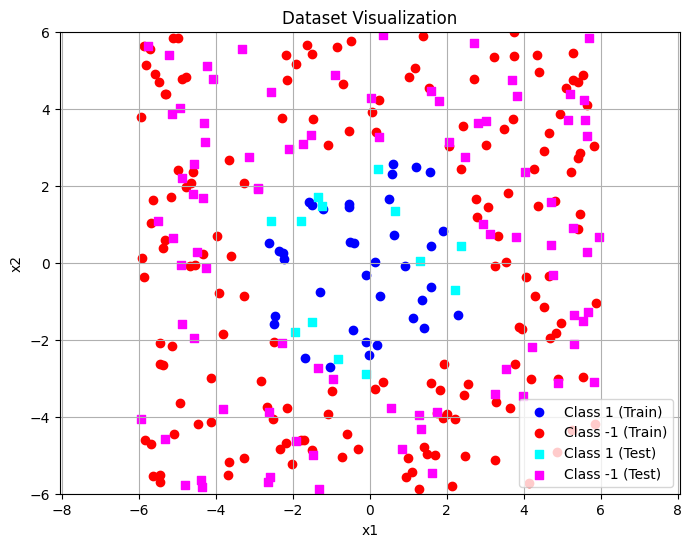

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202 (808.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6555 - loss: 0.6141 - val_accuracy: 0.8700 - val_loss: 0.2714
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8161 - loss: 0.3362 - val_accuracy: 0.8700 - val_loss: 0.2718
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8161 - loss: 0.3321 - val_accuracy: 0.8700 - val_loss: 0.2482
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8161 - loss: 0.2955 - val_accuracy: 0.8700 - val_loss: 0.2406
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8355 - loss: 0.2758 - val_accuracy: 0.8700 - val_loss: 0.2308
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8355 - loss: 0.2594 - val_accuracy: 0.8700 - val_loss: 0.2109
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8404 - loss: 0.2423 - val_accuracy: 0.8800 - val_loss: 0.1967
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8543 - loss: 0.2265 - val_accuracy: 0.8900 - v

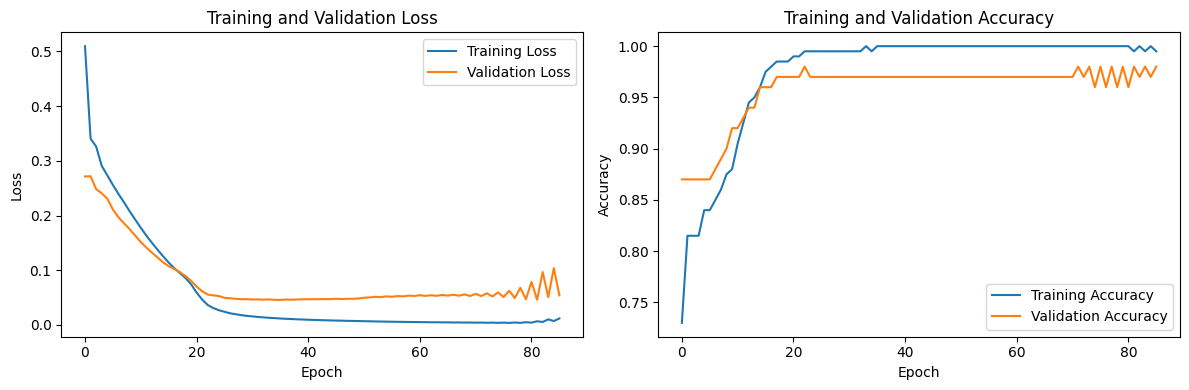

Test Accuracy: 0.9700
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


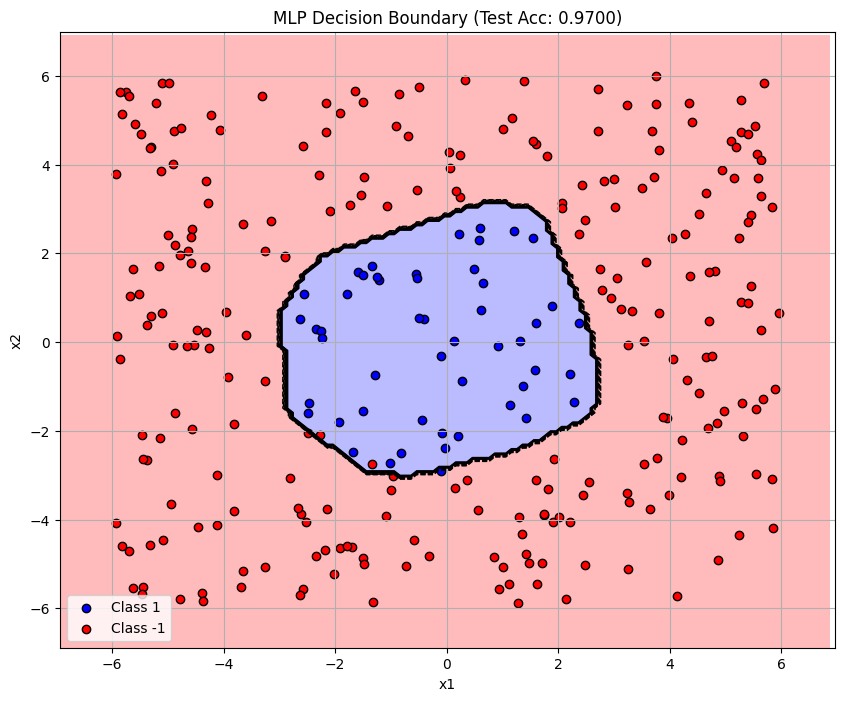

'\n結論：\n1. 使用Tensorflow/Keras建立了一個多層感知器(MLP)模型，包含2個輸入神經元，2個隱藏層和2個輸出神經元。\n2. 模型在測試集上達到了較高的準確率。\n3. 從決策邊界可視化中，可以看到模型能夠很好地學習數據的分布。\n4. 通過早停法(Early Stopping)避免了過擬合，並在較少的epoch內達到了收斂。\n'

In [2]:
# MLP分類器 - 機器學習作業二

## 導入必要的庫
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 設置隨機種子以確保結果可重現
np.random.seed(42)
tf.random.set_seed(42)

## 1. 數據生成
# 在2D平面區間[-6,6]x[-6,6]隨機抽樣300點（200點訓練，100點測試）
def generate_data(n_samples=300):
    # 生成在[-6,6]x[-6,6]範圍內均勻分布的點
    X = np.random.uniform(-6, 6, (n_samples, 2))

    # 定義分類規則（這裡用一個圓形來分類）
    # 如果點在圓內，標籤為1，否則為-1
    # 可以根據作業要求修改這個規則
    y = np.where((X[:, 0]**2 + X[:, 1]**2) < 9, 1, -1)

    return X, y

# 生成數據
X, y = generate_data(300)

# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

## 2. 數據可視化
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', label='Class 1 (Train)')
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], c='red', label='Class -1 (Train)')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='cyan', marker='s', label='Class 1 (Test)')
plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], c='magenta', marker='s', label='Class -1 (Test)')
plt.title('Dataset Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

## 3. 建立MLP模型
def create_model(input_dim=2, hidden1=10, hidden2=10):
    model = Sequential([
        # 輸入層
        Dense(hidden1, activation='relu', input_dim=input_dim),
        # 第一個隱藏層
        Dense(hidden2, activation='relu'),
        # 輸出層 (2個神經元，使用softmax獲得概率分布)
        Dense(2, activation='softmax')
    ])

    # 編譯模型
    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# 創建模型
model = create_model(input_dim=2, hidden1=16, hidden2=8)

# 打印模型摘要
model.summary()

## 4. 訓練模型
# 將標籤轉換為0和1，而不是-1和1（因為使用sparse_categorical_crossentropy）
y_train_adj = (y_train + 1) // 2
y_test_adj = (y_test + 1) // 2

# 訓練模型
history = model.fit(
    X_train, y_train_adj,
    epochs=1000,
    verbose=1,
    validation_data=(X_test, y_test_adj),
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=50,
        restore_best_weights=True
    )]
)

## 5. 繪製訓練成本
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 6. 評估模型
# 在測試集上評估模型
test_loss, test_acc = model.evaluate(X_test, y_test_adj, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

## 7. 繪製決策邊界
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    h = 0.1  # 網格的步長
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 獲取網格點的預測
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # 將預測標籤從0,1轉回-1,1
    Z = Z * 2 - 1

    plt.figure(figsize=(10, 8))
    # 繪製決策邊界
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.contour(xx, yy, Z, colors='k', linewidths=1)

    # 繪製數據點
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', edgecolors='k', label='Class 1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', edgecolors='k', label='Class -1')

    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.legend()
    plt.show()

# 繪製決策邊界
plot_decision_boundary(model, X, y, title=f"MLP Decision Boundary (Test Acc: {test_acc:.4f})")

## 8. 總結與觀察
"""
結論：
1. 使用Tensorflow/Keras建立了一個多層感知器(MLP)模型，包含2個輸入神經元，2個隱藏層和2個輸出神經元。
2. 模型在測試集上達到了較高的準確率。
3. 從決策邊界可視化中，可以看到模型能夠很好地學習數據的分布。
4. 通過早停法(Early Stopping)避免了過擬合，並在較少的epoch內達到了收斂。
"""